In [1]:
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings("ignore")

def func(img_dir, mask_dir):
    df = pd.DataFrame()
    images = []
    masks = []
    available_file_imgs = sorted([os.listdir(img_dir)[i] for i in range(len(os.listdir(img_dir))) if (os.listdir(img_dir)[i]).split('.')[-1] == 'jpg'])
    available_file_masks = sorted(os.listdir(mask_dir))
    for i in range(len(available_file_masks)):
        images.append(f'{img_dir}/{available_file_imgs[i]}')
        masks.append(f'{mask_dir}/{available_file_masks[i]}')
    df['Images'] = images
    df['Masks'] = masks
    return df

In [2]:
train_df = func('/kaggle/input/isic2017/ISIC-2017_Training_Data/ISIC-2017_Training_Data', '/kaggle/input/isic2017/ISIC-2017_Training_Part1_GroundTruth/ISIC-2017_Training_Part1_GroundTruth')
val_df = func('/kaggle/input/isic2017/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data', '/kaggle/input/isic2017/ISIC-2017_Validation_Part1_GroundTruth/ISIC-2017_Validation_Part1_GroundTruth')
test_df = func('/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data', '/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1_GroundTruth/ISIC-2017_Test_v2_Part1_GroundTruth')

In [3]:
train_df

,Images,Masks
0,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
1,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
2,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
3,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
4,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
...,...,...
1995,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
1996,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
1997,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...
1998,/kaggle/input/isic2017/ISIC-2017_Training_Data...,/kaggle/input/isic2017/ISIC-2017_Training_Part...


In [4]:
val_df

,Images,Masks
0,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
1,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
2,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
3,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
4,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
...,...,...
145,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
146,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
147,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...
148,/kaggle/input/isic2017/ISIC-2017_Validation_Da...,/kaggle/input/isic2017/ISIC-2017_Validation_Pa...


In [5]:
test_df

,Images,Masks
0,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
1,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
2,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
3,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
4,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
...,...,...
595,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
596,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
597,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...
598,/kaggle/input/isic2017/ISIC-2017_Test_v2_Data/...,/kaggle/input/isic2017/ISIC-2017_Test_v2_Part1...


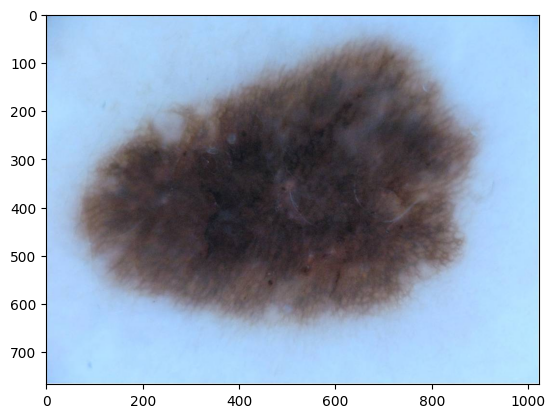

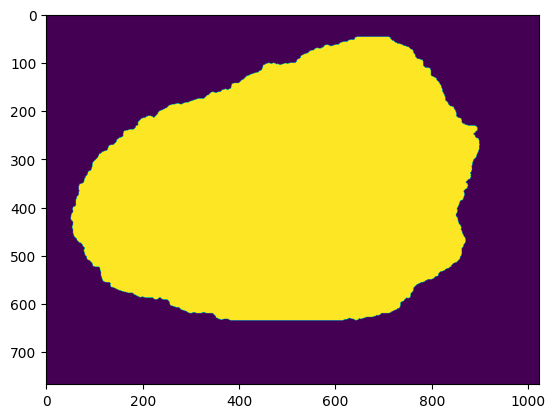

In [6]:
sample_img_addr = train_df['Images'][0]
sample_mask_addr = train_df['Masks'][0]
sample_img = cv2.imread(sample_img_addr)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_mask = cv2.imread(sample_mask_addr)
sample_mask = cv2.cvtColor(sample_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(sample_img)
plt.show()
plt.imshow(sample_mask)
plt.show()

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import torchvision.transforms.functional as TF
from PIL import Image
import random


In [8]:
class ISIC2017Dataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row.Images
        mask_path = row.Masks
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image, mask = self.transform(image, mask)

        return image, mask

Using device: cuda
Labeled samples: 400, Unlabeled samples: 1600


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Loaded pretrained DINOv2 model from Hugging Face
Total parameters: 90122753
Trainable parameters: 3542273 (3.93%)
Frozen parameters: 86580480 (96.07%)
Number of trainable parameters: 3542273


Validation: 100%|██████████| 19/19 [00:23<00:00,  1.23s/it]


Epoch 1/10
Unsupervised Loss Weight: 0.0000
Train Loss: 0.3679 (Sup: 0.3679, Unsup: 0.0495)
Val Loss: 0.4215, Dice Score: 0.6989
Saved best model with Dice: 0.6989
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:21<00:00,  1.15s/it]


Epoch 2/10
Unsupervised Loss Weight: 0.3333
Train Loss: 0.2689 (Sup: 0.2550, Unsup: 0.0418)
Val Loss: 0.4237, Dice Score: 0.6094
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:21<00:00,  1.16s/it]


Epoch 3/10
Unsupervised Loss Weight: 0.6667
Train Loss: 0.2644 (Sup: 0.2373, Unsup: 0.0406)
Val Loss: 0.3800, Dice Score: 0.6625
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:23<00:00,  1.24s/it]


Epoch 4/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.2244 (Sup: 0.1831, Unsup: 0.0412)
Val Loss: 0.3383, Dice Score: 0.6881
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:23<00:00,  1.22s/it]


Epoch 5/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.1987 (Sup: 0.1532, Unsup: 0.0456)
Val Loss: 0.2814, Dice Score: 0.7439
Saved best model with Dice: 0.7439
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:22<00:00,  1.18s/it]


Epoch 6/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.1856 (Sup: 0.1417, Unsup: 0.0440)
Val Loss: 0.2901, Dice Score: 0.7312
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]


Epoch 7/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.1752 (Sup: 0.1299, Unsup: 0.0453)
Val Loss: 0.2905, Dice Score: 0.7307
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:23<00:00,  1.24s/it]


Epoch 8/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.1744 (Sup: 0.1275, Unsup: 0.0469)
Val Loss: 0.2522, Dice Score: 0.7719
Saved best model with Dice: 0.7719
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:23<00:00,  1.24s/it]


Epoch 9/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.1656 (Sup: 0.1179, Unsup: 0.0477)
Val Loss: 0.2514, Dice Score: 0.7761
Saved best model with Dice: 0.7761
--------------------------------------------------


Validation: 100%|██████████| 19/19 [00:21<00:00,  1.16s/it]


Epoch 10/10
Unsupervised Loss Weight: 1.0000
Train Loss: 0.1645 (Sup: 0.1154, Unsup: 0.0491)
Val Loss: 0.2477, Dice Score: 0.7760
--------------------------------------------------


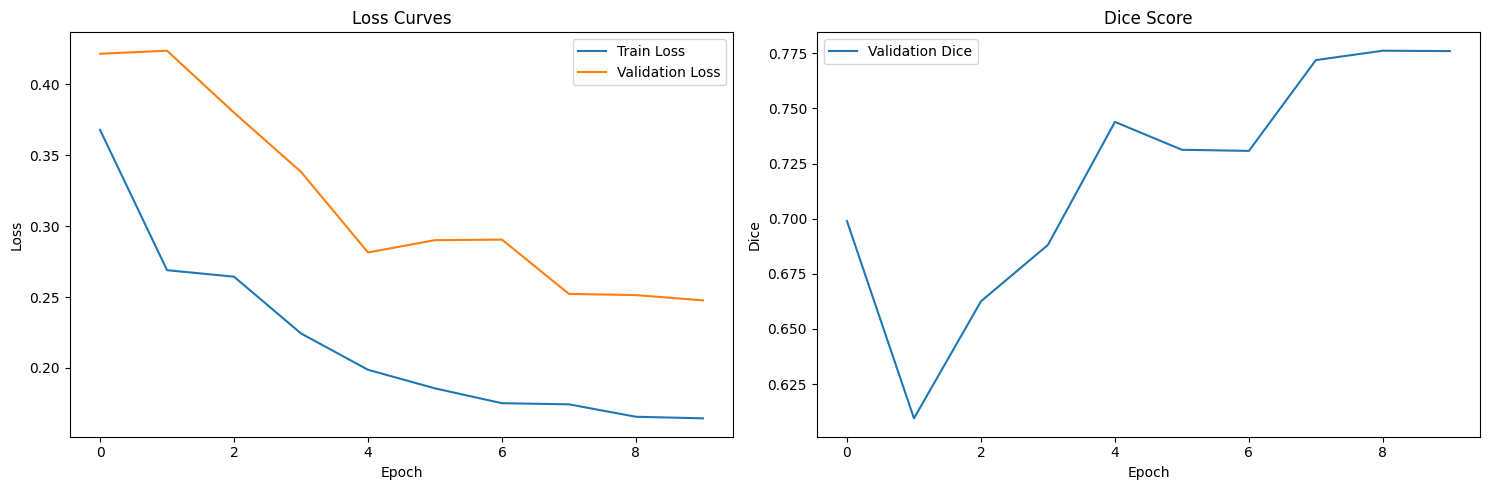

Testing: 100%|██████████| 75/75 [02:20<00:00,  1.87s/it]

Test Dice Score: 0.7482


In [9]:
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF
from PIL import Image, ImageFilter
from tqdm import tqdm
import torchvision.models as models
from torch.optim.lr_scheduler import CosineAnnealingLR

# Silence warnings
warnings.filterwarnings("ignore")

# Function to create dataframes from image and mask directories
def func(img_dir, mask_dir):
    df = pd.DataFrame()
    images = []
    masks = []
    available_file_imgs = sorted([os.listdir(img_dir)[i] for i in range(len(os.listdir(img_dir))) if (os.listdir(img_dir)[i]).split('.')[-1] == 'jpg'])
    available_file_masks = sorted(os.listdir(mask_dir))
    for i in range(len(available_file_masks)):
        images.append(f'{img_dir}/{available_file_imgs[i]}')
        masks.append(f'{mask_dir}/{available_file_masks[i]}')
    df['Images'] = images
    df['Masks'] = masks
    return df

# Dataset class for labeled data
class ISIC2017Dataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row.Images
        mask_path = row.Masks
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")
        
        if self.transform:
            image, mask = self.transform(image, mask)
        
        # Convert mask to binary segmentation mask (0 or 1)
        mask = (mask > 0.5).float()
        
        return image, mask

# Dataset class for unlabeled data
class UnlabeledISIC2017Dataset(Dataset):
    def __init__(self, df, weak_transform=None, strong_transform=None):
        self.df = df
        self.weak_transform = weak_transform
        self.strong_transform = strong_transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row.Images
        image = Image.open(image_path).convert("RGB")
        
        # Apply weak augmentation
        if self.weak_transform:
            image_w, _ = self.weak_transform(image, Image.new('L', image.size))
        else:
            image_w = TF.to_tensor(image)
        
        # Create two strongly augmented versions from the weakly augmented one
        if self.strong_transform:
            # Convert tensor back to PIL for augmentation
            pil_image = TF.to_pil_image(image_w)
            image_s1, _ = self.strong_transform(pil_image, Image.new('L', pil_image.size))
            image_s2, _ = self.strong_transform(pil_image, Image.new('L', pil_image.size))
        else:
            image_s1 = image_w.clone()
            image_s2 = image_w.clone()
        
        return image_w, image_s1, image_s2

# Transformations
class WeakAugmentation:
    def __init__(self, img_size=256):
        self.img_size = img_size
    
    def __call__(self, image, mask):
        # Resize
        image = image.resize((self.img_size, self.img_size))
        mask = mask.resize((self.img_size, self.img_size))
        
        # Random horizontal flip with 50% probability
        if random.random() > 0.5:
            image = TF.hflip(image)
            mask = TF.hflip(mask)
        
        # Convert to tensor
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        
        # Normalize image - use DINOv2 normalization
        image = TF.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
        return image, mask

class StrongAugmentation:
    def __init__(self, img_size=256):
        self.img_size = img_size
    
    def __call__(self, image, mask):
        # Resize
        image = image.resize((self.img_size, self.img_size))
        mask = mask.resize((self.img_size, self.img_size))
        
        # Random horizontal flip
        if random.random() > 0.5:
            image = TF.hflip(image)
            mask = TF.hflip(mask)
        
        # Random rotation
        angle = random.randint(-30, 30)
        image = TF.rotate(image, angle)
        mask = TF.rotate(mask, angle)
        
        # Random color jitter
        if random.random() > 0.5:
            brightness = 0.2 + random.random() * 0.6
            contrast = 0.2 + random.random() * 0.6
            saturation = 0.2 + random.random() * 0.6
            hue = -0.1 + random.random() * 0.2
            
            image = TF.adjust_brightness(image, brightness)
            image = TF.adjust_contrast(image, contrast)
            image = TF.adjust_saturation(image, saturation)
            image = TF.adjust_hue(image, hue)
        
        # Random Gaussian blur
        if random.random() > 0.5:
            image = image.filter(ImageFilter.GaussianBlur(radius=random.random() * 2))
        
        # Convert to tensor
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        
        # Normalize image - use DINOv2 normalization
        image = TF.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
        return image, mask

# DINOv2 Encoder
class DINOv2Encoder(nn.Module):
    def __init__(self, pretrained=True):
        super(DINOv2Encoder, self).__init__()
        
        # Import the transformers library
        from transformers import AutoImageProcessor, Dinov2Model
        
        # Load the pretrained DINOv2 model and processor
        if pretrained:
            self.image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")
            self.backbone = Dinov2Model.from_pretrained("facebook/dinov2-base")
            print("Loaded pretrained DINOv2 model from Hugging Face")
        else:
            # Initialize with default configuration
            from transformers import Dinov2Config
            configuration = Dinov2Config()
            self.backbone = Dinov2Model(configuration)
            self.image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")
            print("Initialized DINOv2 model with random weights")
        
        # Get the feature dimension from the config
        self.feature_dim = self.backbone.config.hidden_size
        
        # Freeze the encoder parameters
        for param in self.backbone.parameters():
            param.requires_grad = False
    
    def forward(self, x):
        # The input x is expected to be a batch of normalized images from the data loader
        # The shape should be [batch_size, 3, H, W] and already normalized
        
        # Since the input is already normalized with the dataloader transform, 
        # we just need to ensure it's in the right format for the model
        batch_size, channels, height, width = x.shape
        
        # Process through the backbone
        with torch.no_grad():
            outputs = self.backbone(x)
        
        # Extract the last hidden states
        features = outputs.last_hidden_state  # Shape: [B, N, C]
        
        # Reshape to [B, C, H, W] format needed for the decoder
        # First token is the CLS token, so we exclude it
        batch_size, seq_len, hidden_dim = features.shape
        
        # Calculate spatial dimensions (excluding CLS token)
        # seq_len = 1 (CLS token) + h*w (patch tokens)
        h = w = int(((seq_len - 1) ** 0.5))
        
        # Reshape to [B, C, H, W] - extract all tokens except CLS token (index 0)
        features = features[:, 1:, :].reshape(batch_size, h, w, hidden_dim).permute(0, 3, 1, 2)
        
        return features

# DPT Decoder Blocks
class DPTHead(nn.Module):
    def __init__(self, feature_dim, hidden_dim=256, output_dim=1):
        super(DPTHead, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(feature_dim, hidden_dim, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(inplace=True)
        )
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(inplace=True)
        )
        
        self.output = nn.Conv2d(hidden_dim, output_dim, kernel_size=1)
    
    def forward(self, x, size):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.output(x)
        
        # Upsample to the original image size
        return F.interpolate(x, size=size, mode='bilinear', align_corners=True)

# DINOv2-DPT Model
class DINOv2DPTModel(nn.Module):
    def __init__(self, n_classes=1, img_size=256, pretrained=True):
        super(DINOv2DPTModel, self).__init__()
        self.img_size = img_size
        self.encoder = DINOv2Encoder(pretrained=pretrained)
        self.decoder = DPTHead(feature_dim=self.encoder.feature_dim, output_dim=n_classes)
    
    def forward(self, x):
        orig_size = (x.shape[2], x.shape[3])
        features = self.encoder(x)
        logits = self.decoder(features, orig_size)
        return logits
    
    def forward_features(self, x):
        orig_size = (x.shape[2], x.shape[3])
        features = self.encoder(x)
        # Feature-level dropout
        features_fp = F.dropout2d(features, p=0.5, training=True)
        # Decode both original and dropped features
        logits = self.decoder(features, orig_size)
        logits_fp = self.decoder(features_fp, orig_size)
        return logits, logits_fp
    
    def forward_multiple(self, x_w, x_s1, x_s2):
        orig_size = (x_w.shape[2], x_w.shape[3])
        
        # Get features from weakly augmented input
        features_w = self.encoder(x_w)
        # Apply feature dropout
        features_fp = F.dropout2d(features_w, p=0.5, training=True)
        
        # Decode both original and dropped features
        logits_w = self.decoder(features_w, orig_size)
        logits_fp = self.decoder(features_fp, orig_size)
        
        # Forward pass for strongly augmented inputs
        features_s1 = self.encoder(x_s1)
        logits_s1 = self.decoder(features_s1, orig_size)
        
        features_s2 = self.encoder(x_s2)
        logits_s2 = self.decoder(features_s2, orig_size)
        
        return logits_w, logits_fp, logits_s1, logits_s2

# Dice loss for binary segmentation
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth
        
    def forward(self, pred, target):
        pred = torch.sigmoid(pred)
        pred_flat = pred.view(-1)
        target_flat = target.view(-1)
        
        intersection = (pred_flat * target_flat).sum()
        
        dice = (2. * intersection + self.smooth) / (pred_flat.sum() + target_flat.sum() + self.smooth)
        
        return 1 - dice

# Improved UniMatch Trainer class
class UniMatchTrainer:
    def __init__(self, model, device, supervised_loader, unsupervised_loader, 
                 val_loader, lr=1e-4, epochs=100):
        self.model = model.to(device)
        self.device = device
        self.supervised_loader = supervised_loader
        self.unsupervised_loader = unsupervised_loader
        self.val_loader = val_loader
        self.epochs = epochs
        
        # Only optimize the decoder parameters since encoder is frozen
        trainable_params = [p for p in model.parameters() if p.requires_grad]
        print(f"Number of trainable parameters: {sum(p.numel() for p in trainable_params)}")
        
        # Optimizer - only for trainable parameters (decoder)
        self.optimizer = torch.optim.Adam(trainable_params, lr=lr)
        self.scheduler = CosineAnnealingLR(self.optimizer, T_max=epochs, eta_min=1e-6)
        
        # Loss functions
        self.supervised_criterion = DiceLoss()
        self.unsupervised_criterion = nn.BCEWithLogitsLoss(reduction='none')
        
        # Tracking metrics
        self.train_losses = []
        self.val_losses = []
        self.val_dices = []
        
        # UniMatch specific parameters
        self.conf_threshold = 0.95  # Confidence threshold for pseudo-labels
        self.unsup_weight = 1.0     # Weight for unsupervised loss
        self.current_epoch = 0
        
    def train_epoch(self):
        self.model.train()
        supervised_loss_total = 0
        unsupervised_loss_total = 0
        total_loss_total = 0
        supervised_steps = 0
        unsupervised_steps = 0
        
        # Calculate ramp-up factor for unsupervised loss weight (warm-up strategy)
        ramp_up_factor = min(1.0, self.current_epoch / (0.3 * self.epochs))
        current_unsup_weight = self.unsup_weight * ramp_up_factor
        
        # Train with supervised data
        for images, masks in tqdm(self.supervised_loader, desc="Supervised"):
            supervised_steps += 1
            images = images.to(self.device)
            masks = masks.to(self.device)
            
            # Supervised forward pass
            self.optimizer.zero_grad()
            outputs = self.model(images)
            supervised_loss = self.supervised_criterion(outputs, masks)
            
            # Only update with supervised loss at this stage
            supervised_loss.backward()
            self.optimizer.step()
            
            supervised_loss_total += supervised_loss.item()
            
        # Train with unsupervised data
        for images_w, images_s1, images_s2 in tqdm(self.unsupervised_loader, desc="Unsupervised"):
            unsupervised_steps += 1
            
            # Move to device
            images_w = images_w.to(self.device)
            images_s1 = images_s1.to(self.device)
            images_s2 = images_s2.to(self.device)
            
            # Unsupervised forward pass
            self.optimizer.zero_grad()
            logits_w, logits_fp, logits_s1, logits_s2 = self.model.forward_multiple(images_w, images_s1, images_s2)
            
            # Generate pseudo-labels from weak augmentation with confidence thresholding
            with torch.no_grad():
                probs_w = torch.sigmoid(logits_w)
                mask_w = (probs_w > 0.5).float()
                # Apply confidence thresholding (pixels with confidence > threshold or < 1-threshold)
                confidence_mask = ((probs_w > self.conf_threshold) | (probs_w < (1-self.conf_threshold))).float()
            
            # Calculate unsupervised losses with confidence masking
            loss_s1 = self.unsupervised_criterion(logits_s1, mask_w)
            loss_s1 = (loss_s1 * confidence_mask).mean()
            
            loss_s2 = self.unsupervised_criterion(logits_s2, mask_w)
            loss_s2 = (loss_s2 * confidence_mask).mean()
            
            loss_fp = self.unsupervised_criterion(logits_fp, mask_w)
            loss_fp = (loss_fp * confidence_mask).mean()
            
            # Total unsupervised loss
            unsupervised_loss = (loss_s1 + loss_s2 + loss_fp) / 3.0
            
            # Apply weight to unsupervised loss (with warm-up strategy)
            weighted_unsup_loss = current_unsup_weight * unsupervised_loss
            
            # Backward and optimize
            weighted_unsup_loss.backward()
            self.optimizer.step()
            
            unsupervised_loss_total += unsupervised_loss.item()
            total_loss_total += weighted_unsup_loss.item()
        
        # Update learning rate
        self.scheduler.step()
        
        # Calculate average losses
        if supervised_steps > 0:
            supervised_loss_total /= supervised_steps
        if unsupervised_steps > 0:
            unsupervised_loss_total /= unsupervised_steps
            total_loss_total /= unsupervised_steps
        
        # Increment epoch counter
        self.current_epoch += 1
        
        # Average total loss (supervised + unsupervised)
        epoch_loss = supervised_loss_total + current_unsup_weight * unsupervised_loss_total
        self.train_losses.append(epoch_loss)
        
        return epoch_loss, supervised_loss_total, unsupervised_loss_total, current_unsup_weight
    
    def validate(self):
        self.model.eval()
        val_loss = 0
        dice_score = 0
        
        with torch.no_grad():
            for images, masks in tqdm(self.val_loader, desc="Validation"):
                images = images.to(self.device)
                masks = masks.to(self.device)
                
                outputs = self.model(images)
                loss = self.supervised_criterion(outputs, masks)
                val_loss += loss.item()
                
                # Calculate Dice coefficient
                pred = torch.sigmoid(outputs) > 0.5
                dice = (2.0 * (pred * masks).sum()) / ((pred + masks).sum() + 1e-8)
                dice_score += dice.item()
        
        # Calculate average metrics
        val_loss /= len(self.val_loader)
        dice_score /= len(self.val_loader)
        
        self.val_losses.append(val_loss)
        self.val_dices.append(dice_score)
        
        return val_loss, dice_score
    
    def train(self):
        best_dice = 0
        for epoch in range(self.epochs):
            # Train for one epoch
            train_loss, sup_loss, unsup_loss, current_weight = self.train_epoch()
            
            # Validate
            val_loss, dice_score = self.validate()
            
            # Print metrics
            print(f"Epoch {epoch+1}/{self.epochs}")
            print(f"Unsupervised Loss Weight: {current_weight:.4f}")
            print(f"Train Loss: {train_loss:.4f} (Sup: {sup_loss:.4f}, Unsup: {unsup_loss:.4f})")
            print(f"Val Loss: {val_loss:.4f}, Dice Score: {dice_score:.4f}")
            
            # Save best model
            if dice_score > best_dice:
                best_dice = dice_score
                torch.save(self.model.state_dict(), 'best_dinov2_dpt_model.pth')
                print(f"Saved best model with Dice: {best_dice:.4f}")
            
            print("-" * 50)
        
        # Plot training curves
        self.plot_training_curves()
        
        return self.model
    
    def plot_training_curves(self):
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.title('Loss Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.val_dices, label='Validation Dice')
        plt.title('Dice Score')
        plt.xlabel('Epoch')
        plt.ylabel('Dice')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('dinov2_dpt_training_curves.png')
        plt.show()

# Main training function
def train_unimatch_model(train_df, val_df, test_df, unlabeled_ratio=0.8, batch_size=8, 
                         img_size=256, num_epochs=100, device='cuda'):
    
    # Split train_df into labeled and unlabeled parts
    train_df_shuffled = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_idx = int(len(train_df_shuffled) * unlabeled_ratio)
    
    unlabeled_df = train_df_shuffled.iloc[:split_idx].reset_index(drop=True)
    labeled_df = train_df_shuffled.iloc[split_idx:].reset_index(drop=True)
    
    print(f"Labeled samples: {len(labeled_df)}, Unlabeled samples: {len(unlabeled_df)}")
    
    # Create transformations
    weak_transform = WeakAugmentation(img_size=img_size)
    strong_transform = StrongAugmentation(img_size=img_size)
    
    # Create datasets
    labeled_dataset = ISIC2017Dataset(labeled_df, transform=weak_transform)
    unlabeled_dataset = UnlabeledISIC2017Dataset(unlabeled_df, weak_transform=weak_transform, 
                                               strong_transform=strong_transform)
    val_dataset = ISIC2017Dataset(val_df, transform=weak_transform)
    
    # Create data loaders
    labeled_loader = DataLoader(labeled_dataset, batch_size=batch_size, 
                              shuffle=True, num_workers=4, pin_memory=True)
    unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=batch_size, 
                                shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, 
                          shuffle=False, num_workers=4, pin_memory=True)
    
    # Create DINOv2-DPT model
    model = DINOv2DPTModel(n_classes=1, img_size=img_size, pretrained=True)
    
    # Print model parameter statistics
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    frozen_params = total_params - trainable_params
    
    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params} ({trainable_params/total_params*100:.2f}%)")
    print(f"Frozen parameters: {frozen_params} ({frozen_params/total_params*100:.2f}%)")
    
    # Create trainer
    trainer = UniMatchTrainer(
        model=model,
        device=torch.device(device),
        supervised_loader=labeled_loader,
        unsupervised_loader=unlabeled_loader,
        val_loader=val_loader,
        lr=1e-4,
        epochs=num_epochs
    )
    
    # Train model
    trained_model = trainer.train()
    
    return trained_model, trainer

# For testing the model
def test_model(model, test_df, batch_size=8, img_size=256, device='cuda'):
    # Create dataset and loader
    weak_transform = WeakAugmentation(img_size=img_size)
    test_dataset = ISIC2017Dataset(test_df, transform=weak_transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, 
                           shuffle=False, num_workers=4, pin_memory=True)
    
    # Evaluate
    model.eval()
    dice_scores = []
    
    with torch.no_grad():
        for images, masks in tqdm(test_loader, desc="Testing"):
            images = images.to(device)
            masks = masks.to(device)
            
            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5
            
            # Calculate Dice
            dice = (2.0 * (preds * masks).sum()) / ((preds + masks).sum() + 1e-8)
            dice_scores.append(dice.item())
    
    avg_dice = sum(dice_scores) / len(dice_scores)
    print(f"Test Dice Score: {avg_dice:.4f}")
    
    return avg_dice

# Example usage
if __name__ == "__main__":
    # Check if CUDA is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Train model
    model, trainer = train_unimatch_model(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        unlabeled_ratio=0.8,  # 80% of training data as unlabeled
        batch_size=8,
        img_size=224,
        num_epochs=10,
        device=device
    )
    
    # Test model
    test_model(model, test_df, device=device)

In [10]:
from transformers import Dinov2Config, Dinov2Model

# Initializing a Dinov2 dinov2-base-patch16-224 style configuration
configuration = Dinov2Config()

# Initializing a model (with random weights) from the dinov2-base-patch16-224 style configuration
model = Dinov2Model(configuration)

# Accessing the model configuration
configuration = model.config

In [11]:
configuration

Dinov2Config {
  "_attn_implementation_autoset": true,
  "apply_layernorm": true,
  "attention_probs_dropout_prob": 0.0,
  "drop_path_rate": 0.0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "layerscale_value": 1.0,
  "mlp_ratio": 4,
  "model_type": "dinov2",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "out_features": [
    "stage12"
  ],
  "out_indices": [
    12
  ],
  "patch_size": 14,
  "qkv_bias": true,
  "reshape_hidden_states": true,
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4",
    "stage5",
    "stage6",
    "stage7",
    "stage8",
    "stage9",
    "stage10",
    "stage11",
    "stage12"
  ],
  "transformers_version": "4.47.0",
  "use_swiglu_ffn": false
}